<IPython.core.display.Javascript object>


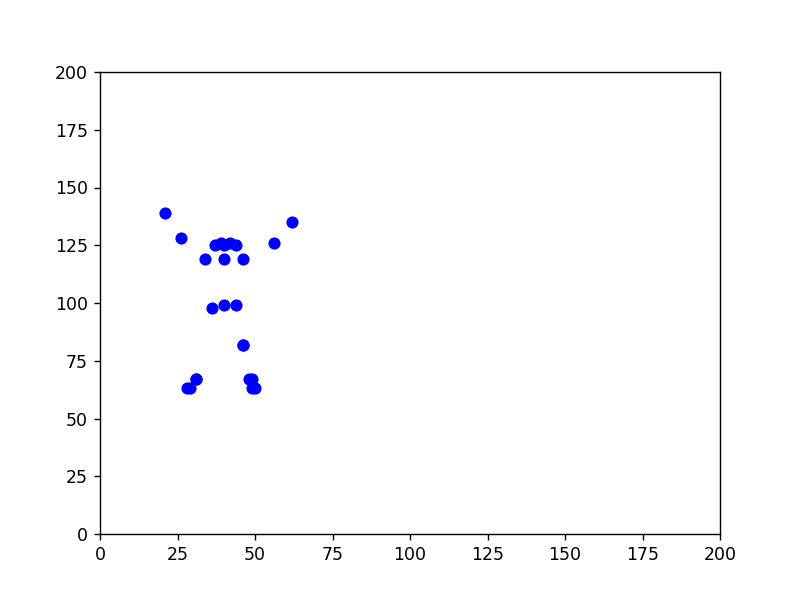

In [10]:
%matplotlib notebook
import csv
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

def extract_even_odd_columns_without_pandas(csv_file, row_index):
    even_values = []
    odd_values = []

    with open(csv_file, 'r') as file:
        csv_reader = csv.reader(file)
        
        # Skip headers if present
        headers = next(csv_reader, None)
        
        for i, row in enumerate(csv_reader):
            if i == row_index:
                for j, value in enumerate(row):
                    if j % 2 == 0:
                        even_values.append(float(value))
                    else:
                        odd_values.append(150-float(value))
                break

    return even_values, odd_values

def plot_values(x_values, y_values):
    plt.scatter(x_values, y_values, color='b')

    plt.xlim(0, 200)  # Set x-axis limits
    plt.ylim(0, 200)  # Set y-axis limits

    plt.show()

csv_file_path = r"C:\Users\Molly Meadows\OneDrive - University of Idaho\Documents\2023-2024\Capstone Project\26-Physical-Rehabilitation\LungeAndShoulderSegmentedVideos\tableData\m01_m_e6.csv"   
#csv_file_path = r"C:\Users\Molly Meadows\OneDrive - University of Idaho\Documents\2023-2024\Capstone Project\26-Physical-Rehabilitation\OwnVideoDatabase\CSVs\VID_20240409_213830350~11.csv"
#csv_file_path = "C:/Users/Molly Meadows/OneDrive - University of Idaho/Documents/2023-2024/Capstone Project/26-Physical-Rehabilitation/OwnVideoDatabase/CSVs/VID_20240411_194256897~2.csv"
#csv_file_path = "C:/Users/Molly Meadows/OneDrive - University of Idaho/Documents/2023-2024/Capstone Project/26-Physical-Rehabilitation/OwnVideoDatabase/CSVs/VID_20240411_175400518~5.csv"
#csv_file_path = 'C:/Users/Molly Meadows/OneDrive - University of Idaho/Documents/2023-2024/Capstone Project/26-Physical-Rehabilitation/OwnVideoDatabase/CSVs/CenteredData/GoodSquats/VID_20240411_175400518~3_smoothed.csv'

with open(csv_file_path, 'r') as file:
    num_rows = sum(1 for line in file) - 1  # Subtract 1 for header row

# Function to update the plot for each animation frame
def update(frame):
    plt.clf()  # Clear the current figure
    even_values, odd_values = extract_even_odd_columns_without_pandas(csv_file_path, frame)
    plot_values(even_values, odd_values)

# Create the animation
fig = plt.figure()
anim = FuncAnimation(fig, update, frames=num_rows, interval=100, repeat=False)
#anim.save('m01_s01_e0.gif', writer='ffmpeg', fps=10)
#writergif = anim.PillowWriter(fps=30)
#anim.save('BadSquat.gif',writer=writergif)

plt.show()

In [4]:
import pandas as pd
def plot_avg_even_columns(csv_file):
    # Read CSV file into a DataFrame
    df = pd.read_csv(csv_file)

    # Compute the average value of even-indexed columns for each row
    avg_values = df.iloc[:, 1::2].mean(axis=1)

    # Plot the average values
    plt.figure(figsize=(8, 6))
    plt.plot(avg_values)
    plt.title("Average Value of Even Columns")
    plt.xlabel("Row")
    plt.ylabel("Average Value")
    plt.grid(True)
    plt.show()

plot_avg_even_columns('tableData195/C_m06_s03.csv')

FileNotFoundError: [Errno 2] No such file or directory: 'tableData195/C_m06_s03.csv'

In [10]:
def interpolate_values(original_list, m):
    n = len(original_list)

    # Calculate the step size for interpolation
    step_size = (n) / (m)

    # Perform linear interpolation
    new_list = []
    for i in range(m):
        low = int(i * step_size)
        high = min(low + 1, n - 1)  # Ensure high index doesn't exceed the bounds of the list
        slope = original_list[high] - original_list[low]
        fraction = (i * step_size) - low

        interpolated_value = original_list[low] + slope * fraction
        new_list.append(interpolated_value)

    return new_list
original_list = [1, 3, 5, 7, 9, 5, 4, 3, 1, 1, 1, 1, 1, 2, 5, 6, 7, 8, 12, 1, 1, 1, 1, 1]

# Specify the desired length of the new list
m = 20

# Call the interpolate_values function
new_list = interpolate_values(original_list, m)

# Print the original and interpolated lists
print("Original list:", original_list)
print("Interpolated list:", new_list)

Original list: [1, 3, 5, 7, 9, 5, 4, 3, 1, 1, 1, 1, 1, 2, 5, 6, 7, 8, 12, 1, 1, 1, 1, 1]
Interpolated list: [1.0, 3.4, 5.8, 8.2, 5.800000000000001, 4.0, 2.6000000000000014, 1.0, 1.0, 1.0, 1.0, 2.599999999999998, 5.399999999999999, 6.6, 7.800000000000001, 12.0, 1.0, 1.0, 1.0, 1.0]
